# Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os


# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# CONNECT TO GDRIVE

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#CONECT TO KAGGLE

---




In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Project'

In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

100% 121M/121M [00:06<00:00, 22.0MB/s]
100% 121M/121M [00:06<00:00, 19.8MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

# Displaying Images

In [ ]:
picture_size = 48
folder_path = "/content/images/images/"

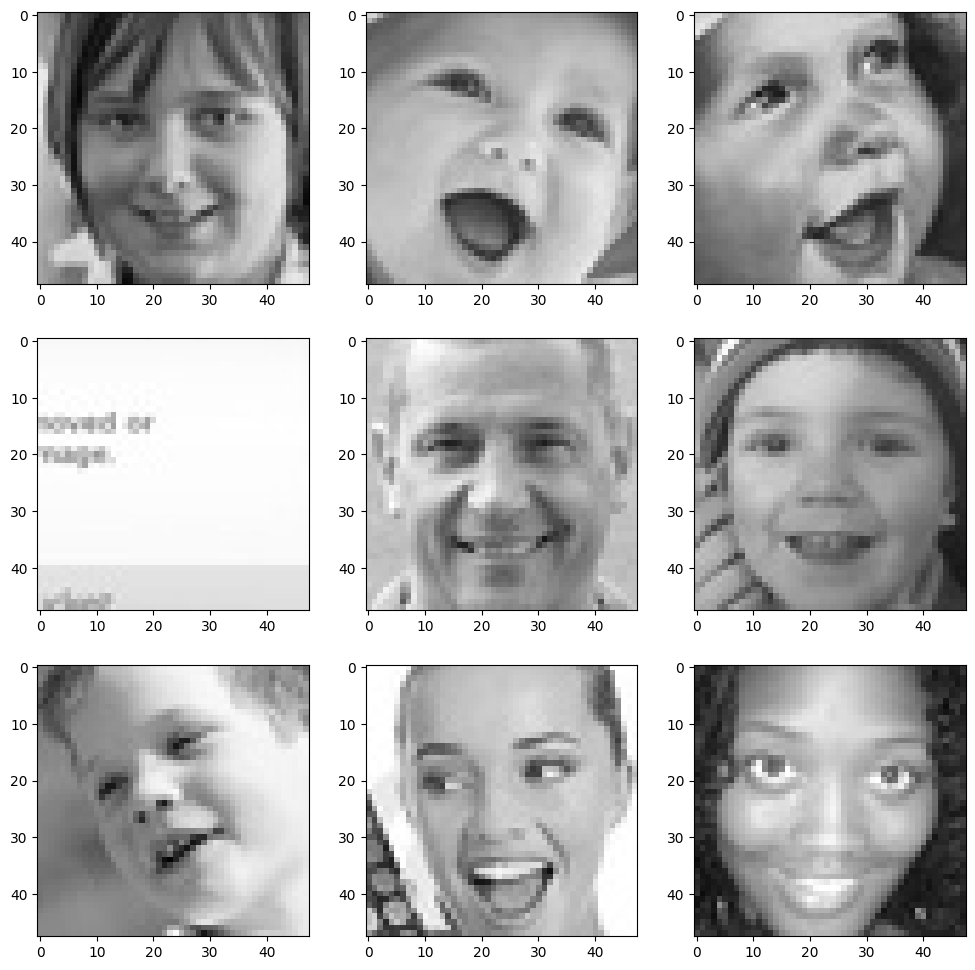

In [ ]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

# Making Training and Validation Data

In [ ]:
# Define picture size
picture_size = 48

# Define batch size
batch_size = 128

# Create image data generators
datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

# Load the train and validation data
train_set = datagen_train.flow_from_directory(
    os.path.join(folder_path, 'train'),
    target_size=(picture_size, picture_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_set = datagen_val.flow_from_directory(
    os.path.join(folder_path, 'validation'),
    target_size=(picture_size, picture_size),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [ ]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

# Fitting the Model with Training and Validation Data

In [ ]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    "./model.keras",  # Use '.keras' extension instead of '.h5'
    monitor='val_acc',
    verbose=1,
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True
)

reduce_learningrate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001
)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 48

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    x=train_set,  # Pass the generator directly to the 'x' argument
    steps_per_epoch=train_set.n//train_set.batch_size,
    epochs=epochs,
    validation_data=test_set,  # Pass the generator directly to the 'validation_data' argument
    validation_steps=test_set.n//test_set.batch_size,
    callbacks=callbacks_list
)

Epoch 1/48
225/225 [==============================] - ETA: 0s - loss: 1.7700 - accuracy: 0.3219

225/225 [==============================] - 29s 75ms/step - loss: 1.7700 - accuracy: 0.3219 - val_loss: 1.7596 - val_accuracy: 0.3636 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.4446 - accuracy: 0.4439

225/225 [==============================] - 21s 94ms/step - loss: 1.4446 - accuracy: 0.4439 - val_loss: 1.6439 - val_accuracy: 0.3928 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.2822 - accuracy: 0.5084

225/225 [==============================] - 17s 74ms/step - loss: 1.2822 - accuracy: 0.5084 - val_loss: 1.4592 - val_accuracy: 0.4585 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 1.1941 - accuracy: 0.5464

225/225 [==============================] - 17s 74ms/step - loss: 1.1941 - accuracy: 0.5464 - val_loss: 1.1691 - val_accuracy: 0.5553 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - ETA: 0s - loss: 1.1309 - accuracy: 0.5696

225/225 [==============================] - 16s 72ms/step - loss: 1.1309 - accuracy: 0.5696 - val_loss: 1.2019 - val_accuracy: 0.5388 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - ETA: 0s - loss: 1.0785 - accuracy: 0.5904

225/225 [==============================] - ETA: 0s - loss: 1.0323 - accuracy: 0.6077

225/225 [==============================] - 17s 76ms/step - loss: 1.0323 - accuracy: 0.6077 - val_loss: 1.1370 - val_accuracy: 0.5760 - lr: 0.0010
Epoch 8/48
225/225 [==============================] - ETA: 0s - loss: 0.9914 - accuracy: 0.6238

225/225 [==============================] - 16s 72ms/step - loss: 0.9914 - accuracy: 0.6238 - val_loss: 1.1066 - val_accuracy: 0.5835 - lr: 0.0010
Epoch 9/48
225/225 [==============================] - ETA: 0s - loss: 0.9531 - accuracy: 0.6371

225/225 [==============================] - 17s 74ms/step - loss: 0.9531 - accuracy: 0.6371 - val_loss: 1.2019 - val_accuracy: 0.5447 - lr: 0.0010
Epoch 10/48
225/225 [==============================] - ETA: 0s - loss: 0.9056 - accuracy: 0.6577

225/225 [==============================] - 16s 71ms/step - loss: 0.9056 - accuracy: 0.6577 - val_loss: 1.1185 - val_accuracy: 0.5868 - lr: 0.0010
Epoch 11/48
225/225 [==============================] - ETA: 0s - loss: 0.8673 - accuracy: 0.6747Restoring model weights from the end of the best epoch: 8.



Epoch 11: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 [==============================] - 17s 77ms/step - loss: 0.8673 - accuracy: 0.6747 - val_loss: 1.1086 - val_accuracy: 0.6027 - lr: 0.0010
Epoch 11: early stopping


# Plotting Accuracy & Loss

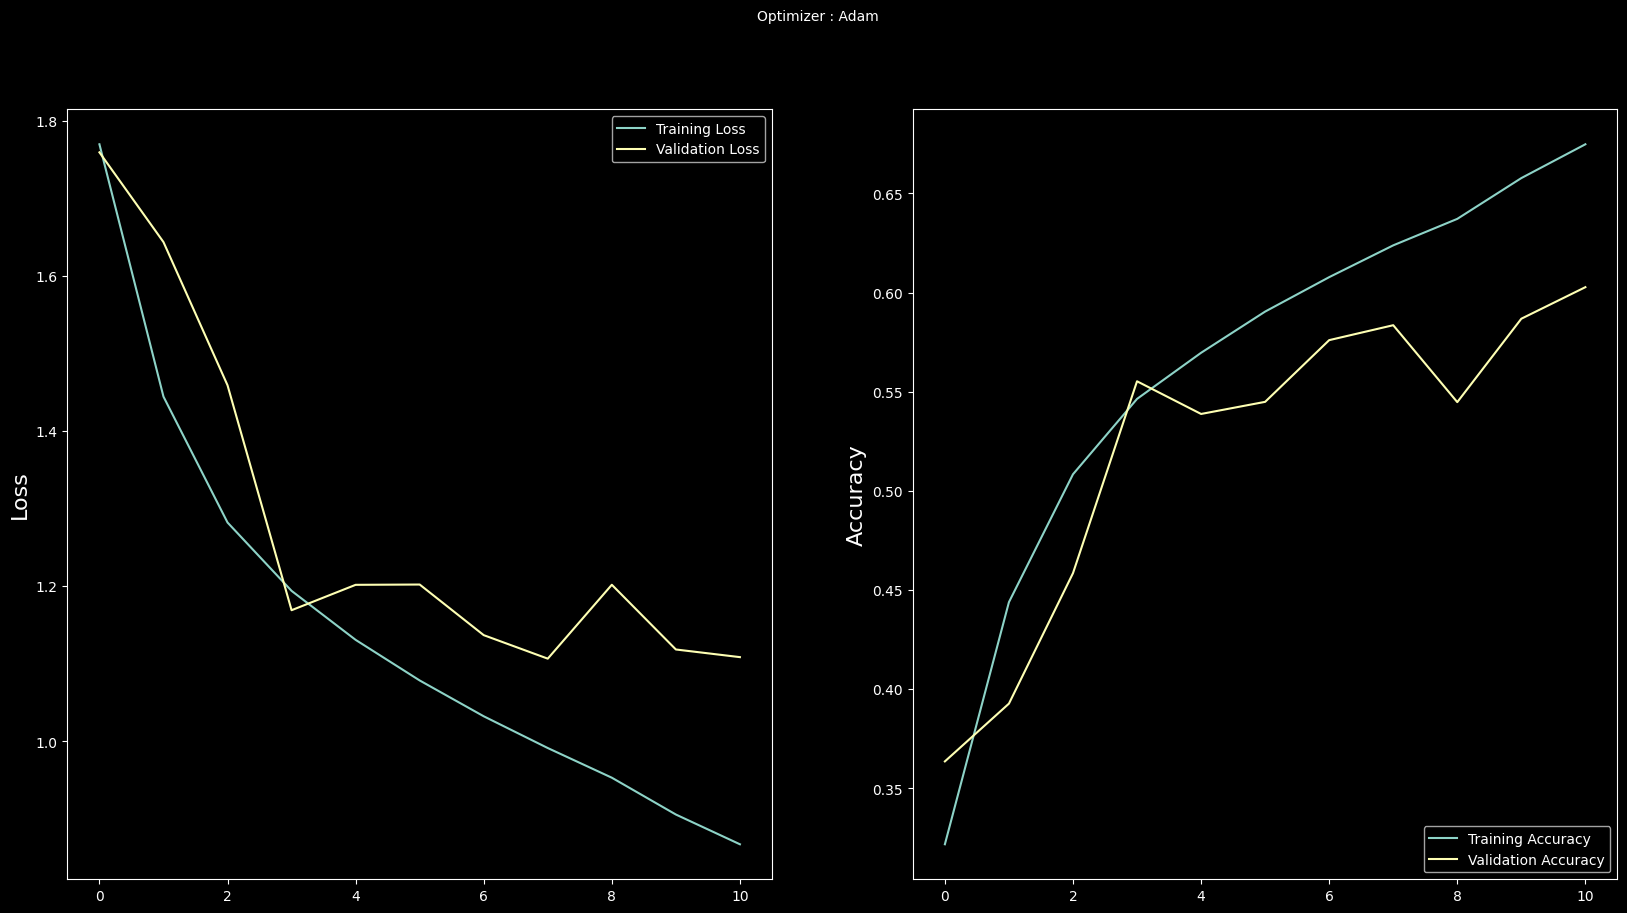

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#MAIN Program


In [ ]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow



1/1 [==============================] - 0s 27ms/step


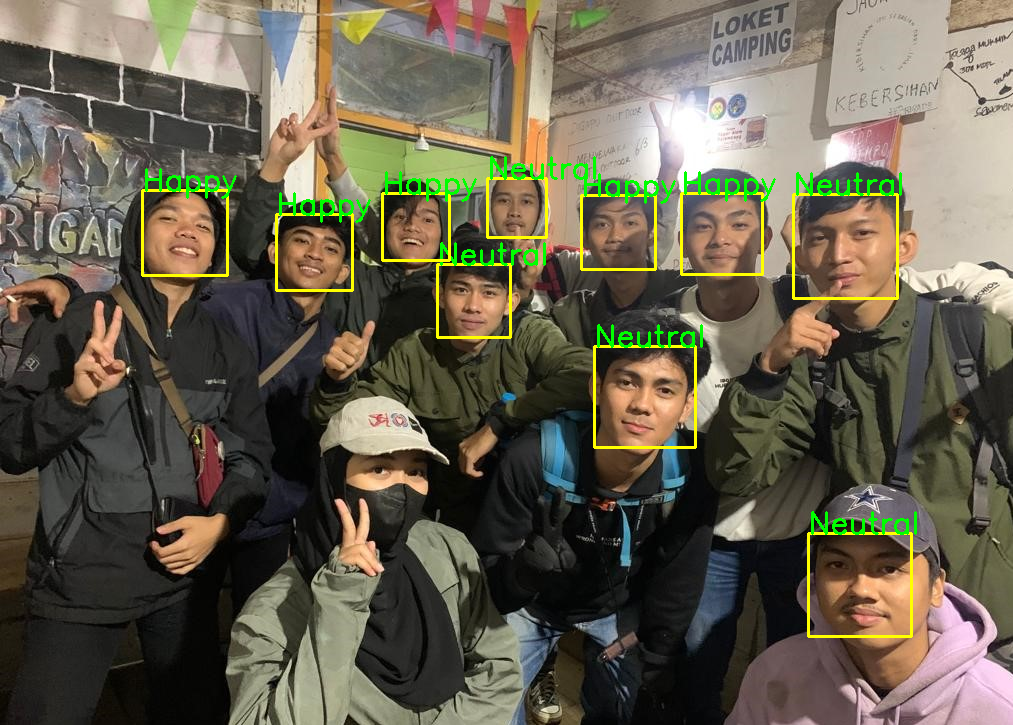

In [ ]:
# Load the pre-trained face classifier
face_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/Project/haarcascade_frontalface_default.xml')

# Load the pre-trained emotion classification model
classifier = load_model('/content/model.h5')
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Baca gambar dari file
frame = cv2.imread('Citra.jpg')

labels = []
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(gray)

for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 2)
    roi_gray = gray[y:y + h, x:x + w]
    roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)
    if np.sum([roi_gray]) != 0:
        roi = roi_gray.astype('float') / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        prediction = classifier.predict(roi)[0]
        label = emotion_labels[prediction.argmax()]
        label_position = (x, y)
        cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    else:
        cv2.putText(frame, 'No Faces', (30, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()
